In [1]:
import awkward as ak
from coffea.util import load
from coffea import hist
import matplotlib.pyplot as plt
import mplhep

import numpy as np

plt.style.use(mplhep.style.CMS)

from coffea.nanoevents.methods import candidate
ak.behavior.update(candidate.behavior)

In [2]:
## Data

# Charmonium 2017E

#file = '../output/Charmonium2017E_test_loose_cuts/Charmonium2017E_test_loose_cuts_hists.coffea'

#file = '../output/test_Charmonium2017E_new_code/test_Charmonium2017E_new_code_hists.coffea'

#### Charmonium 2018B

# Usual cuts 
#file = '../output/Charmonium2018B_test/Charmonium2018B_test_hists.coffea'

# Cut on Dstar before association
#file = '../output/test_cut_background_2d/test_cut_background_2d_hists.coffea'

# Test decay
#file = '../output/test_decay_length/test_decay_length.coffea'
#file = '../output/Charmonium_2018B_comp/Charmonium_2018B_comp_hists.coffea'

#file = '../output/Charmonium2018B_vertex/Charmonium2018B_vertex_hists.coffea'

## Prompt x NonPrompt
#file = '../output/Charmonium_2018B_prompt/Charmonium_2018B_prompt_hists.coffea'
#file = '../output/Charmonium_2018B_nonprompt/Charmonium_2018B_nonprompt_hists.coffea'


## Monte Carlo

#file = '../output/JpsiDstar_2017/JpsiDstar_2017_hists.coffea'

#file = '../output/JpsiDstar_2017_test_loose_cuts_tests/JpsiDstar_2017_test_loose_cuts_tests_hists.coffea'

#file = '../output/test_gen/test_gen_hists.coffea'

#file = '../output/MuOnia_test/MuOnia_test_hists.coffea'

## Usual file - new processing
#file = '../output/test_Monte_Carlo_2017_new_code/test_Monte_Carlo_2017_new_code_hists.coffea'

# No D0 cuts (phi study)
file = '../output/Phi_study_Monte_Carlo_2017_new_code/Phi_study_Monte_Carlo_2017_new_code_hists.coffea'

hists = load(file)
hists.values()

dict_values([<Hist (npvs) instance at 0x7f7dbc2c6d30>, <Hist (pt,eta,phi) instance at 0x7f7d2741b8d0>, <Hist (pt,eta,phi) instance at 0x7f7d273c1128>, <Hist (mass) instance at 0x7f7d273c14e0>, <Hist (pt,eta,phi) instance at 0x7f7d273c16d8>, <Hist (rap) instance at 0x7f7d273c1b00>, <Hist (dl) instance at 0x7f7d273c1cf8>, <Hist (dlSig) instance at 0x7f7d273c1f60>, <Hist (chi2) instance at 0x7f7d273c7208>, <Hist (cosphi) instance at 0x7f7d273c7470>, <Hist (mass) instance at 0x7f7d273c76d8>, <Hist (pt,eta,phi) instance at 0x7f7d273c7940>, <Hist (rap) instance at 0x7f7d273c7d68>, <Hist (dl) instance at 0x7f7d273c7f60>, <Hist (dlSig) instance at 0x7f7d273cb1d0>, <Hist (chi2) instance at 0x7f7d273cb400>, <Hist (cosphi) instance at 0x7f7d273cb630>, <Hist (mass) instance at 0x7f7d273cb860>, <Hist (pt,eta,phi) instance at 0x7f7d273cbac8>, <Hist (rap) instance at 0x7f7d273cbf28>, <Hist (dl) instance at 0x7f7d273d1160>, <Hist (dlSig) instance at 0x7f7d273d1390>, <Hist (chi2) instance at 0x7f7d273d

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


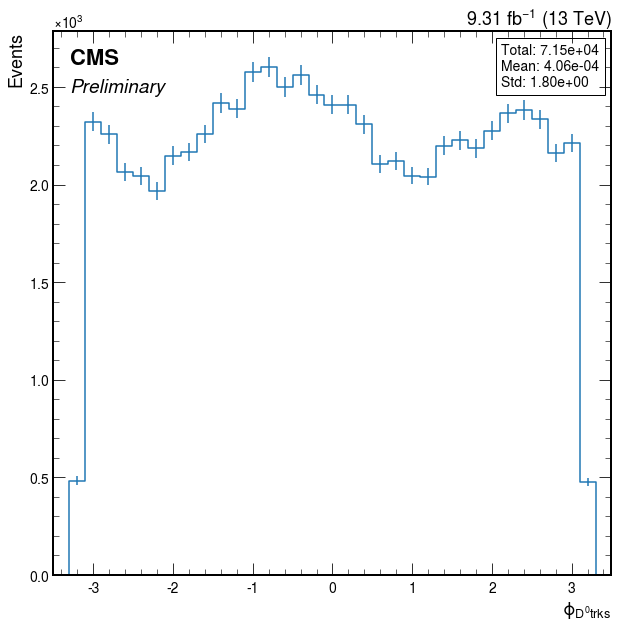

In [8]:
# phi

ax = hists['D0_p'].sum('pt','eta')

bx = ax.rebin("phi", hist.Bin("phi", "$\phi_{D^0 trks}$", 35, -3.5, 3.5))

cx = create_plot1d(bx)

#cx.set_xlim(-2.6, 2.6)

In [3]:
def get_dstar_weight(hist_dstar, hist_wrg_chg):
    hist_dstar_values = hist_dstar.values().get(())
    hist_wrg_chg_values = hist_wrg_chg.values().get(())

    x = int(len(hist_dstar_values)/2)

    hist_dstar_values = hist_dstar_values[x:]
    hist_wrg_chg_values = hist_wrg_chg_values[x:]

    ratio = hist_dstar_values/hist_wrg_chg_values

    return ratio.mean()

In [4]:
def ratio_plot(num, denom):
    # make a nice ratio plot, adjusting some font sizes
    plt.rcParams.update({
        'font.size': 16,
        'axes.titlesize': 18,
        'axes.labelsize': 18,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14
    })
    fig, (ax, rax) = plt.subplots(
        nrows=2,
        ncols=1,
        figsize=(10,10),
        gridspec_kw={"height_ratios": (3, 1)},
        sharex=True
    )
    fig.subplots_adjust(hspace=.07)

    # Here is an example of setting up a color cycler to color the various fill patches
    # We get the colors from this useful utility: http://colorbrewer2.org/
    from cycler import cycler
    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']
    ax.set_prop_cycle(cycler(color=colors))

    fill_opts = {
        'edgecolor': (0,0,0,0.3),
        'alpha': 0.8
    }
    error_opts = {
        'label': 'Stat. Unc.',
        'hatch': '///',
        'facecolor': 'none',
        'edgecolor': (0,0,0,.5),
        'linewidth': 0
    }
    data_err_opts = {
        'linestyle': 'none',
        'marker': '.',
        'markersize': 10.,
        'color': 'k',
        'elinewidth': 1,
    }

    # plot the MC first
    hist.plot1d(
        num,
        ax=ax,
        clear=False,
        line_opts=None,
        fill_opts=fill_opts,
        error_opts=error_opts
    )
    # now the pseudodata, setting clear=False to avoid overwriting the previous plot
    hist.plot1d(
        denom,
        ax=ax,
        clear=False,
        fill_opts=fill_opts,
        error_opts=error_opts
    )

    ax.autoscale(axis='x', tight=True)
    ax.set_ylim(0, None)
    ax.set_xlabel(None)

    # now we build the ratio plot
    hist.plotratio(
        num=num,
        denom=denom,
        ax=rax,
        error_opts=data_err_opts,
        denom_fill_opts={},
        guide_opts={},
        unc='num'
    )
    rax.set_ylabel('Ratio')
    rax.set_ylim(0, 15)
    
    return ax, rax

In [5]:
def create_plot1d(hist1d, log=False, ax=None):
    from matplotlib.offsetbox import AnchoredOffsetbox, TextArea
    plt.style.use(mplhep.style.CMS)
    plt.rcParams.update({
        'font.size': 16,
        'axes.titlesize': 18,
        'axes.labelsize': 18,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14
    })
    fill_opts = {
    'alpha': 0.8,
    'edgecolor':(0,0,0,.5)
    }
    
    data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,}

    
    ax = hist.plot1d(hist1d, ax=ax)#, error_opts=data_err_opts)
    
    # CMS style
    
    CMS = plt.text(0.03, 0.93, "CMS",
                  fontsize=22,
                  fontweight='bold',
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )
    pre = plt.text(0.03, 0.88, "Preliminary",
                  fontsize=19,
                  fontstyle='italic',
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )
    lumi = plt.text(1., 1., r"9.31 fb$^{-1}$ (13 TeV)",
                fontsize=18,
                fontstyle='normal',
                horizontalalignment='right',
                verticalalignment='bottom',
                transform=ax.transAxes
               )

    if log:
        ax.set_yscale('log')
        ax.set_ylim(1, None)
    else:
        ax.ticklabel_format(axis='y', style='sci', scilimits=(0,3), useMathText=True)
    
    axis = hist1d.axes()[0]
    centers = axis.centers()
    values = np.where(hist1d.values().get(()) < 0, 0, hist1d.values().get(()))
    
    # compute mean and std:
    mean = np.sum(values*centers)/np.sum(values)
    std = np.sqrt(np.sum(values*((centers - mean)**2))/np.sum(values))
    
    annotation = TextArea(f"Total: {np.sum(values):.2e}" \
                    + "\n" + f"Mean: {mean:.2e}" \
                    + "\n" + f"Std: {std:.2e}", textprops=dict(size=14))
    
    at = AnchoredOffsetbox('upper right', child=annotation)
    at.patch.set_facecolor('None')
    ax.add_artist(at)
    
    ax.legend().remove()
    
    return ax

In [6]:
def create_plot2d(hist2d, ax=None, xaxis=None):
    plt.style.use(mplhep.style.CMS)
    
    if xaxis == None:
        xaxis = hist2d.axes()[0]
        
    ax = hist.plot2d(hist2d, xaxis, ax=ax)
    
    return ax

In [7]:
def kinematics_plot(hist_p, hist_mass=None):
    plt.rcParams.update({
        'font.size': 16,
        'axes.titlesize': 18,
        'axes.labelsize': 18,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14
    })
    
    fig, ((ax_pt, ax_eta), (ax_phi, ax_mass)) = plt.subplots(
        nrows=2,
        ncols=2,
        figsize=(16,16),
    )
    
    create_plot1d(hist_p.sum('eta', 'phi'), ax=ax_pt, log=True)
    create_plot1d(hist_p.sum('pt', 'phi'), ax=ax_eta, log=False)
    create_plot1d(hist_p.sum('pt', 'eta'), ax=ax_phi, log=False)
    
    if not hist_mass == None:
        create_plot1d(hist_mass, ax=ax_mass, log=False)
    else:
        ax_mass.annotate("Mass plot not provided", xy=(0.5, 0.5), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"))
        
    return ((ax_pt, ax_eta), (ax_phi, ax_mass))

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


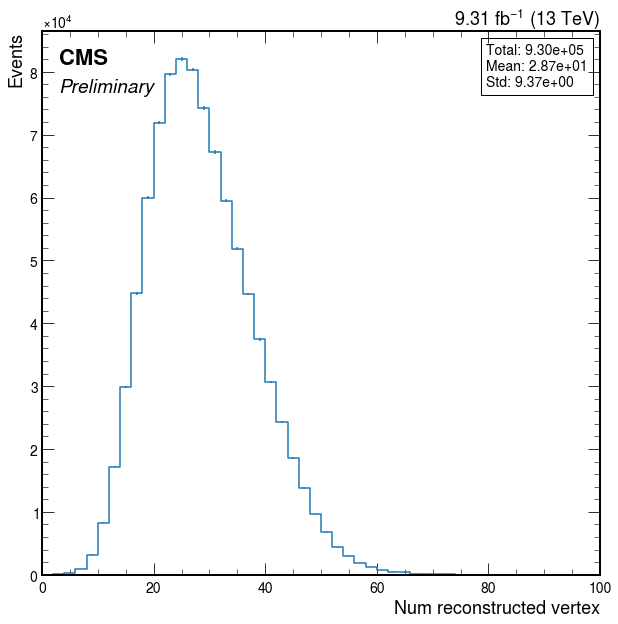

In [10]:
ax = create_plot1d(hists['Primary_vertex_npvs'])

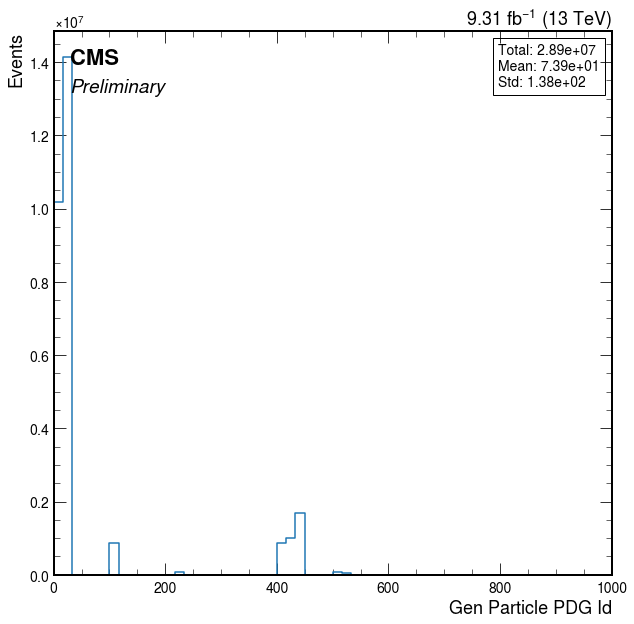

In [11]:
ax = create_plot1d(hists['GenPart_pdgId'])

In [12]:
ax = create_plot1d(hists['GenJpsi_p'].sum('eta', 'phi'))

In [14]:
ax = create_plot1d(hists['GenJpsi_mass'])

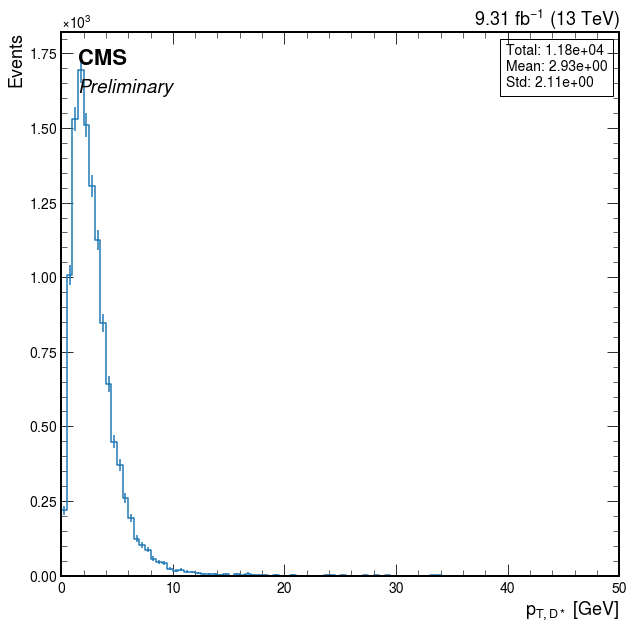

In [13]:
ax = create_plot1d(hists['GenDstar_p'].sum('phi', 'eta'))

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


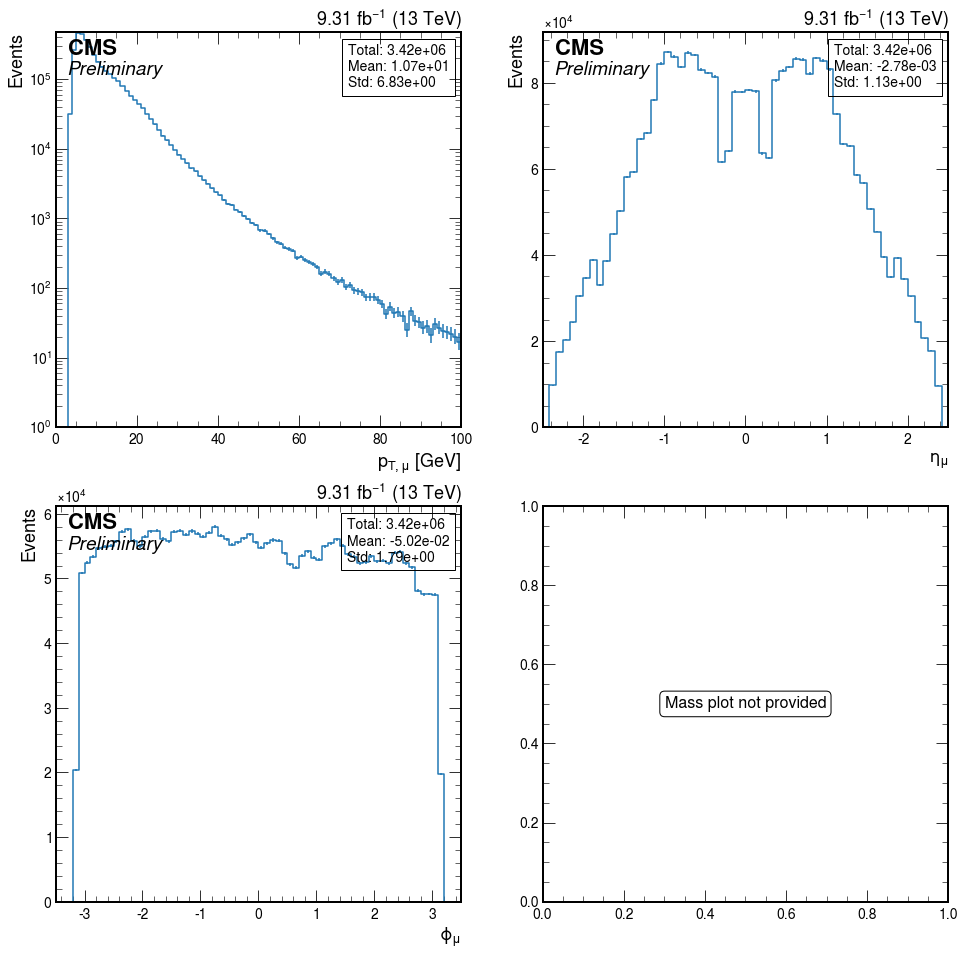

In [9]:
# Muon Lead
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['Muon_lead_p'])

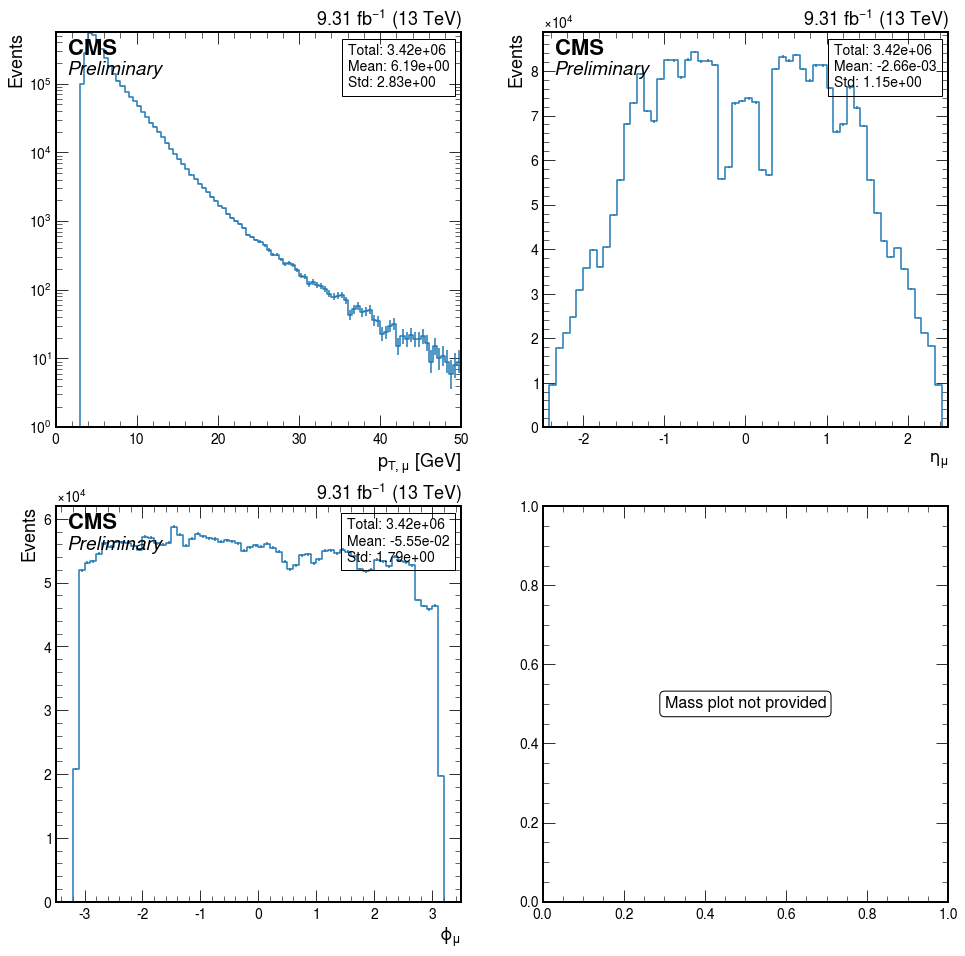

In [10]:
# Muon Trail
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['Muon_trail_p'])

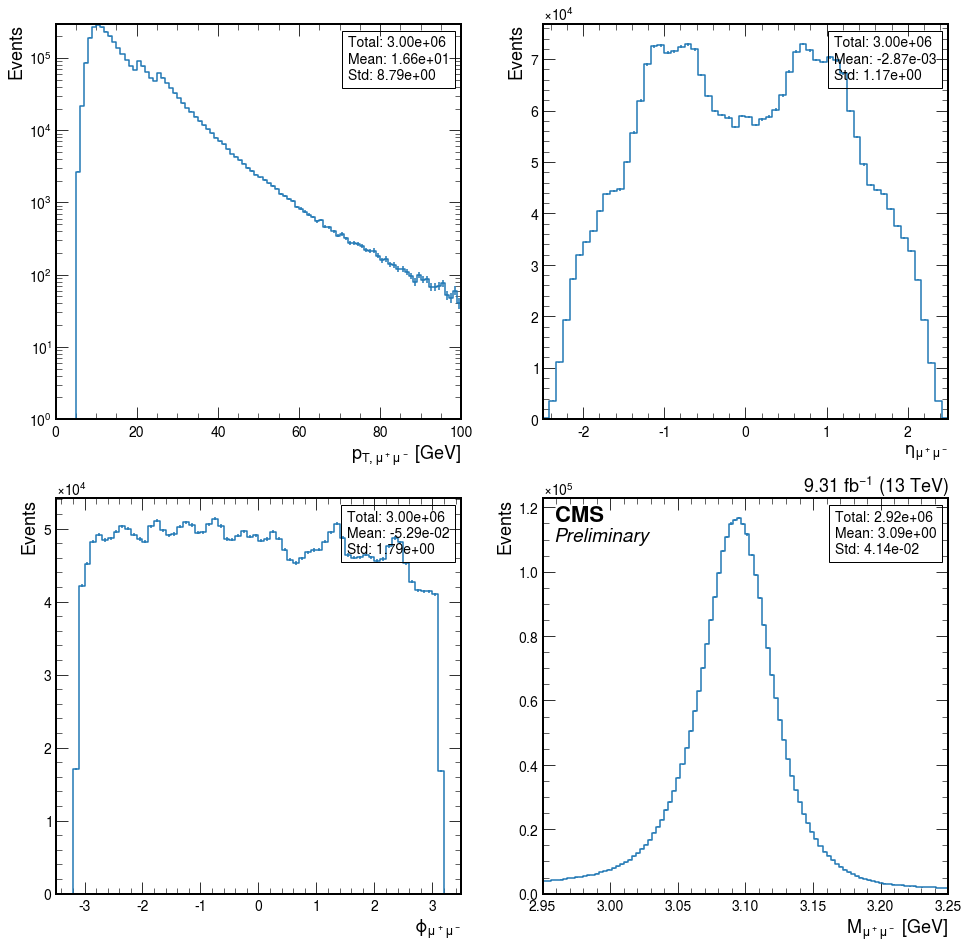

In [12]:
# Jpsi
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['Jpsi_p'], hists['Jpsi_mass'])

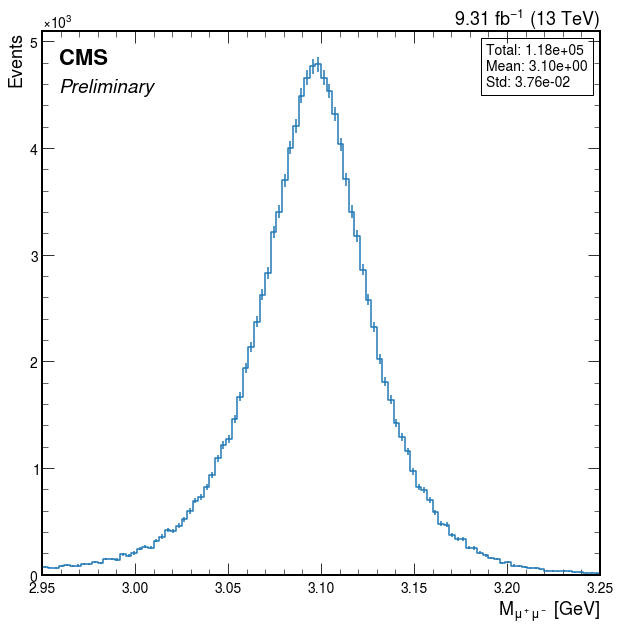

In [18]:
ax = create_plot1d(hists['Jpsi_mass'])

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.1727537790234499, 1000000.0)

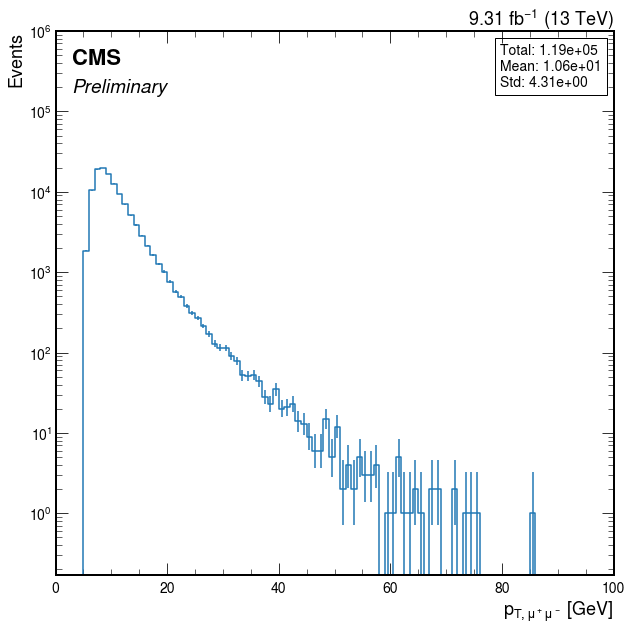

In [19]:
ax = create_plot1d(hists['Jpsi_p'].sum('phi','eta'))
ax.set_yscale('log')
ax.set_ylim(0, 1e6)

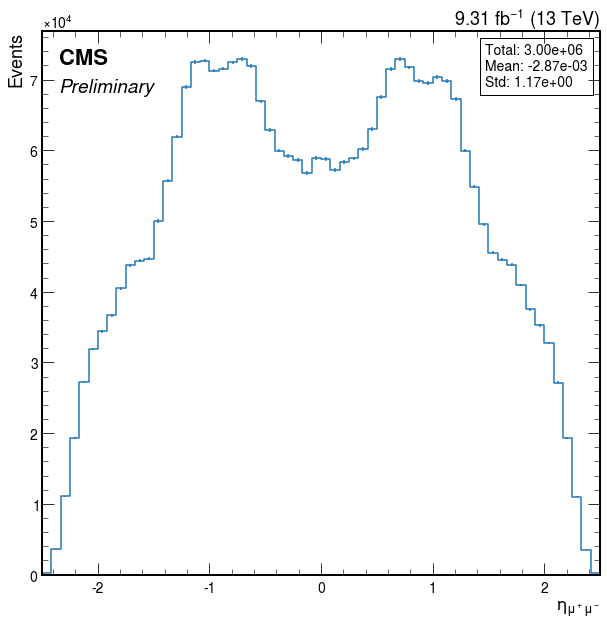

In [13]:
ax = create_plot1d(hists['Jpsi_p'].sum('phi','pt'))

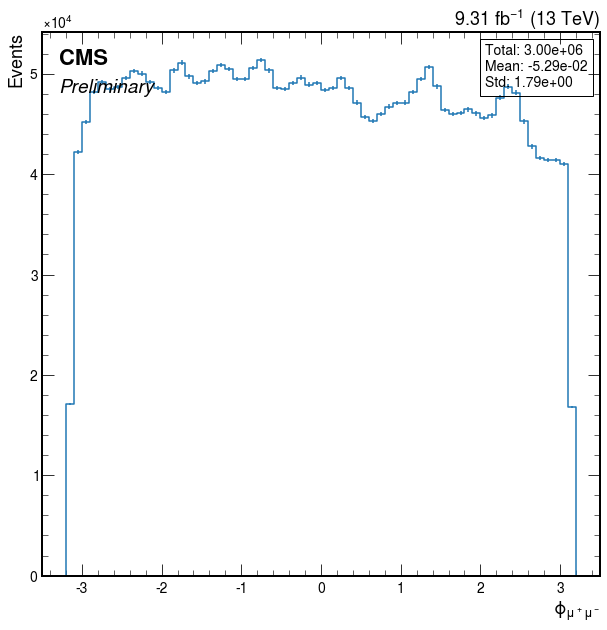

In [14]:
ax = create_plot1d(hists['Jpsi_p'].sum('eta','pt'))

Text(1, 0, 'Decay lenght [cm]')

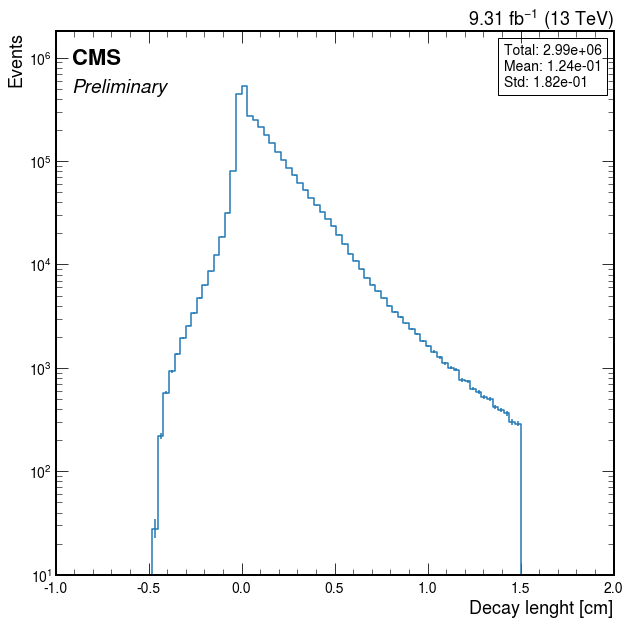

In [15]:
ax = create_plot1d(hists['Jpsi_dl'])
ax.set_yscale('log')
ax.set_xlim(-1,2) 
ax.set_ylim(10, 1.8e6)
ax.set_xlabel('Decay lenght [cm]')

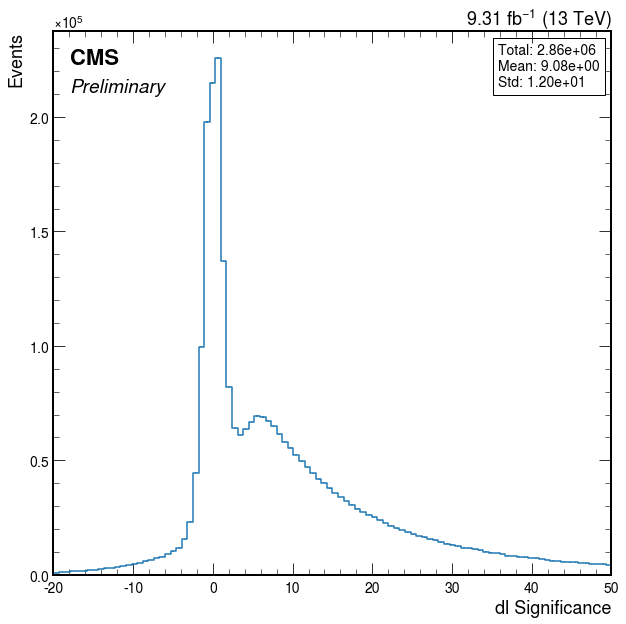

In [16]:
ax = create_plot1d(hists['Jpsi_dlSig'])

(10, 1000000.0)

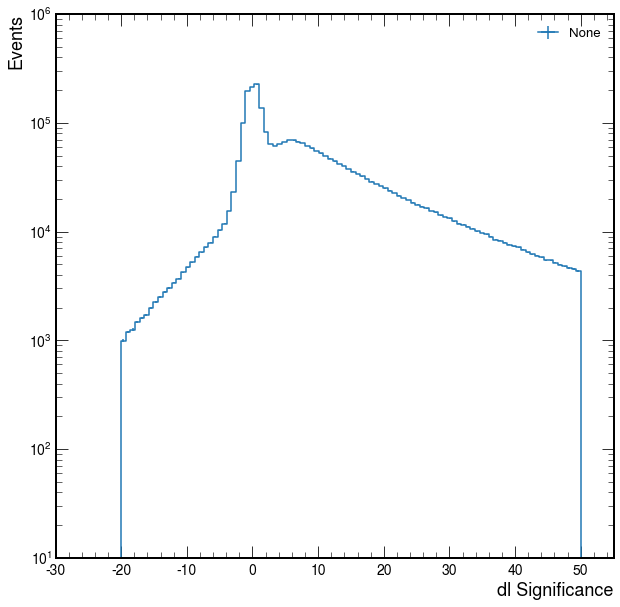

In [17]:
# Signigicance plot - log scale
ax = hist.plot1d(hists['Jpsi_dlSig'])

ax.set_yscale('log')
ax.set_xlim(-30, 55)
ax.set_ylim(10, 1e6)

In [ ]:
ax = create_plot1d(hists['Jpsi_chi2'])

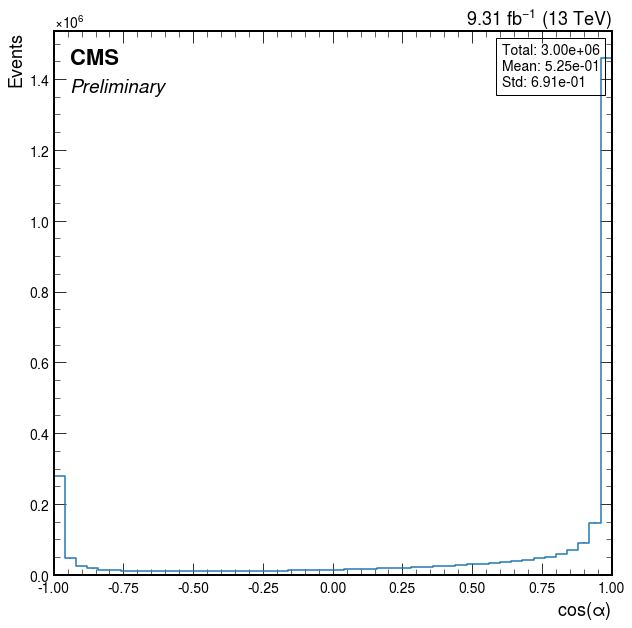

In [18]:
ax = create_plot1d(hists['Jpsi_cosphi'])

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


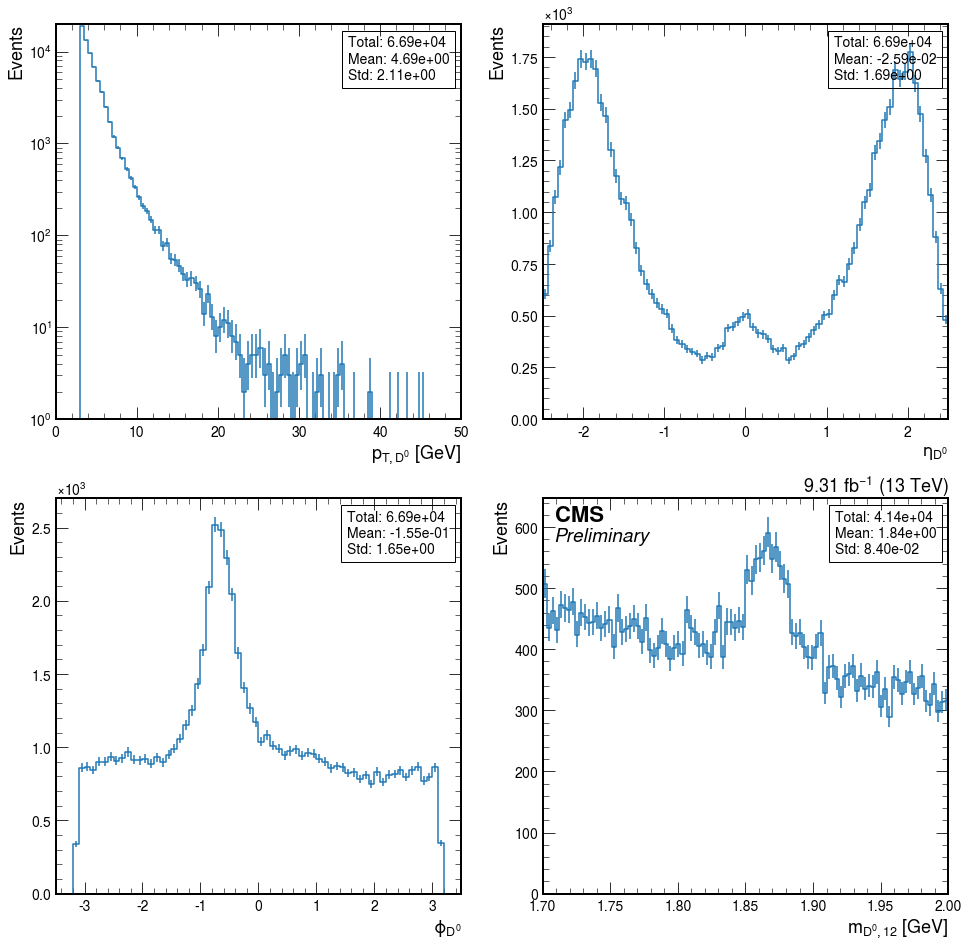

In [8]:
# D0
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['D0_p'], hists['D0_mass12'])

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if sys.path[0] == '':


(42.95266317414391, 100000.0)

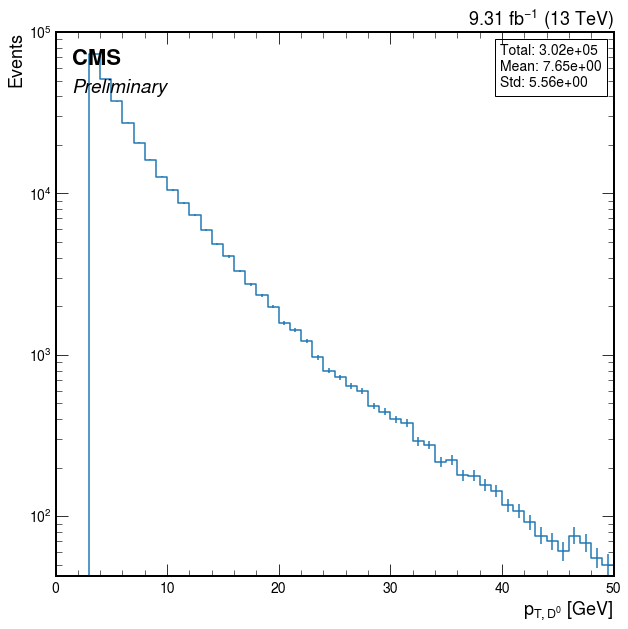

In [48]:
#### Plots organized

# pT

ax = hists['D0_p'].sum('eta','phi')

bx = ax.rebin("pt", hist.Bin("pt", "$p_{T,D^0}$ [GeV]", 50, 0, 50))

cx = create_plot1d(bx)

cx.set_yscale('log')
cx.set_ylim(0, 1e5)

(-2.6, 2.6)

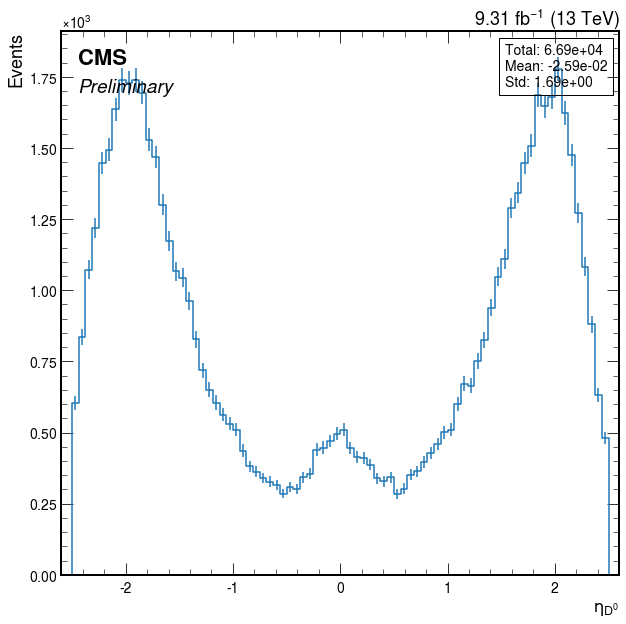

In [27]:
# eta

ax = hists['D0_p'].sum('pt','phi')

bx = ax.rebin("eta", hist.Bin("eta", "$\eta_{D^0}$", 80, -2.5, 2.5))

cx = create_plot1d(bx)

cx.set_xlim(-2.6, 2.6)

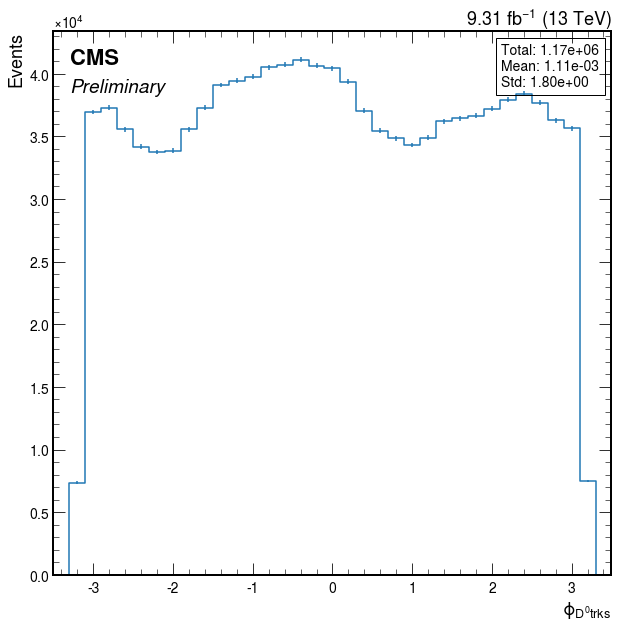

In [16]:
# phi

ax = hists['D0_p'].sum('pt','eta')

bx = ax.rebin("phi", hist.Bin("phi", "$\phi_{D^0 trks}$", 35, -3.5, 3.5))

cx = create_plot1d(bx)

#cx.set_xlim(-2.6, 2.6)

In [ ]:

fill_opts = {
    'alpha': 0.8,
    'edgecolor':(0,0,0,.5)
}
err_opts = {
        'linestyle': 'none',
        'marker': '.',
        'markersize': 10.,
        'elinewidth': 1,
}
    
ax = hist.plot1d(hists['D0_mass12'])
hist.plot1d(hists['D0_mass21'])

handles, labels = ax.get_legend_handles_labels()
labels = ['$m_{K \pi}$', '$m_{\pi K}$']
ax.legend(handles, labels, prop={'size': 16})

ax.set_xlabel('$m_{D^0}$')

In [ ]:
ax = create_plot1d(hists['D0_rap'])

In [ ]:
ax = create_plot1d(hists['D0_dlSig'])

In [ ]:
ax = create_plot1d(hists['D0_chi2'])

In [ ]:
ax = create_plot1d(hists['D0_cosphi'])

In [ ]:
ax = create_plot2d(hists['D0_p'].sum('phi'), xaxis='eta')
#ax.set_ylim(3,10)

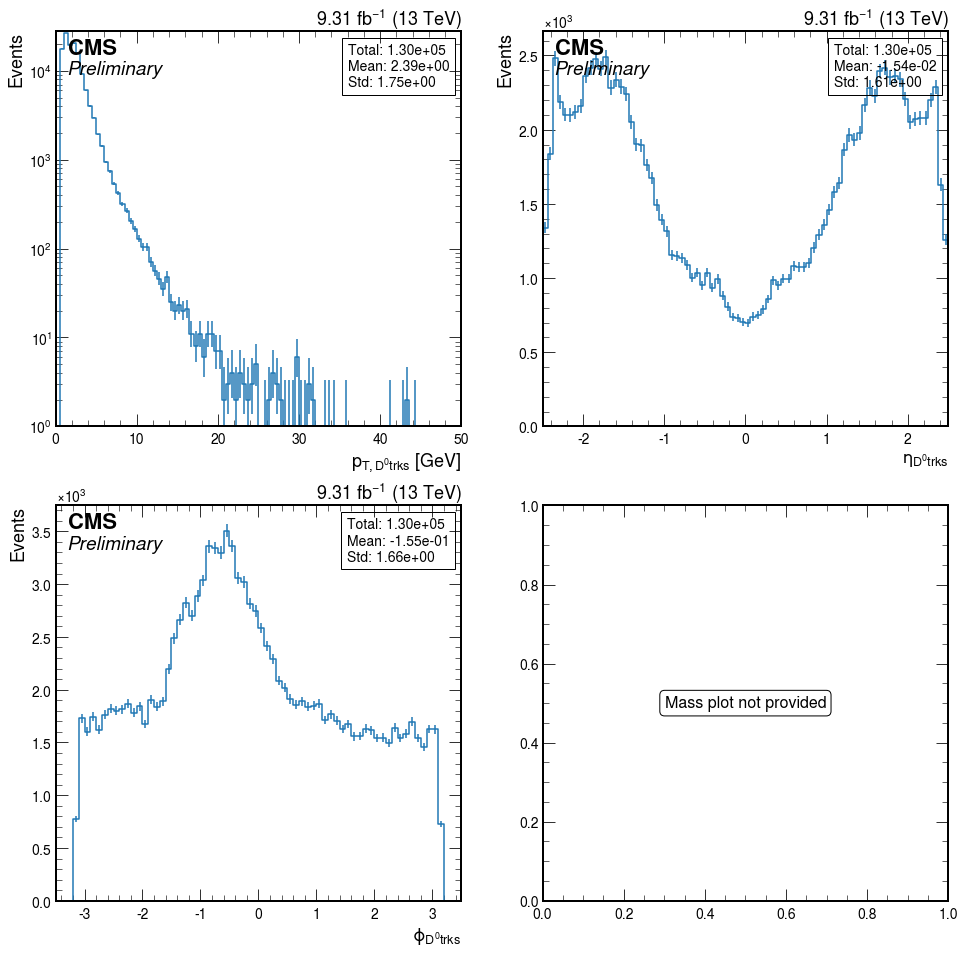

In [29]:
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['D0_trk_p'])

In [ ]:
ax = hist.plot1d(hists['D0_trk_p'].sum('phi','eta'), fill_opts=fill_opts)

ax.set_xlim(0, 4)
ax.set_ylim(1, 1e5)

In [ ]:
ax = create_plot1d(hists['D0_trk_chindof'])

In [ ]:
ax = create_plot1d(hists['D0_trk_nValid'])

In [ ]:
ax = create_plot1d(hists['D0_trk_nPix'])

In [ ]:
ax = create_plot1d(hists['D0_trk_dxy'])

In [ ]:
ax = create_plot1d(hists['D0_trk_dz'])

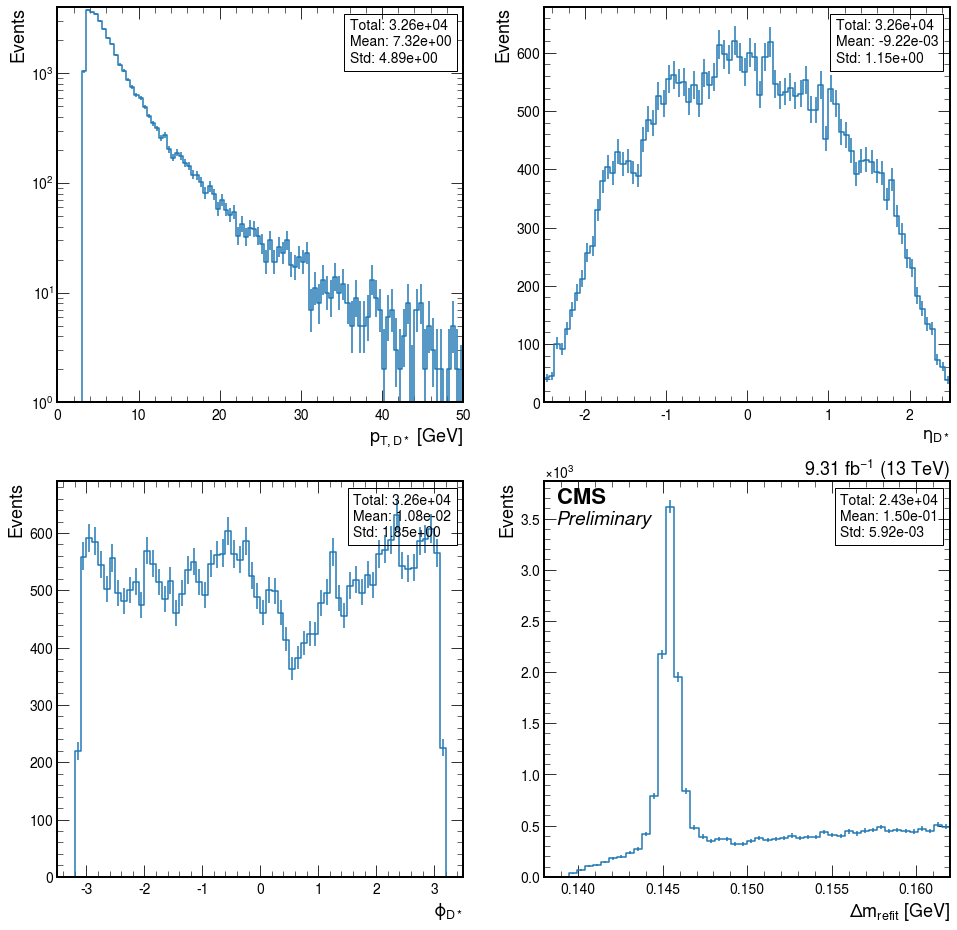

In [43]:
# Dstar right charge
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['Dstar_p'].integrate('chg', 'right charge'), 
                                                       hists['Dstar_deltamr'].integrate('chg', 'right charge'))

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  # This is added back by InteractiveShellApp.init_path()


(0.0, 60.0)

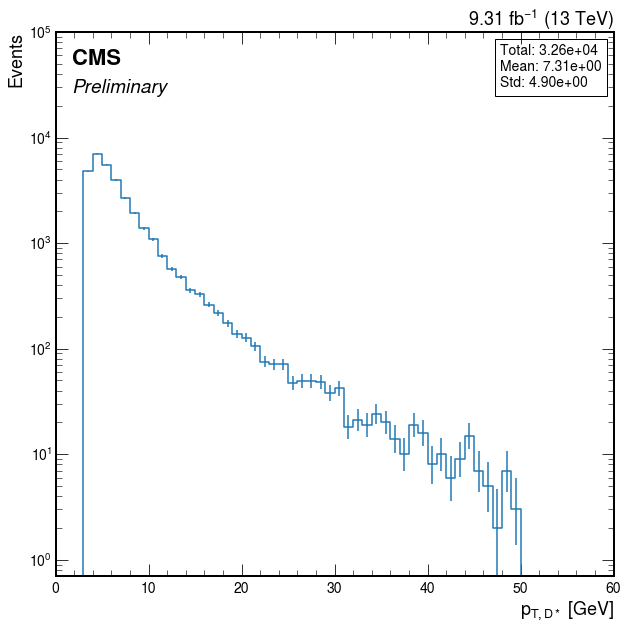

In [52]:
#### Plots organized -> Right charge

# pT

ax = hists['Dstar_p'].integrate('chg', 'right charge').sum('eta','phi')

bx = ax.rebin("pt", hist.Bin("pt", "$p_{T,D*}$ [GeV]", 50, 0, 50))

cx = create_plot1d(bx)
cx.set_yscale('log')
cx.set_ylim(0, 1e5)
cx.set_xlim(0, 60)

(-2.6, 2.6)

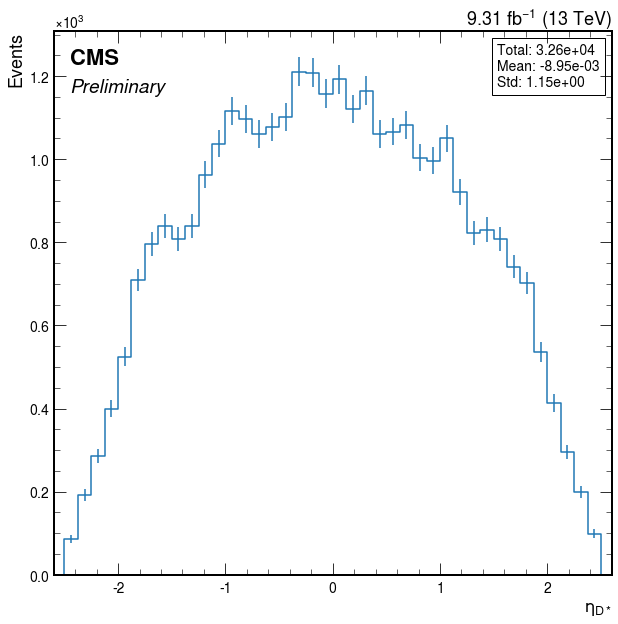

In [53]:
# eta

ax = hists['Dstar_p'].integrate('chg', 'right charge').sum('pt','phi')

bx = ax.rebin("eta", hist.Bin("eta", "$\eta_{D*}$", 40, -2.5, 2.5))

cx = create_plot1d(bx)

cx.set_xlim(-2.6, 2.6)

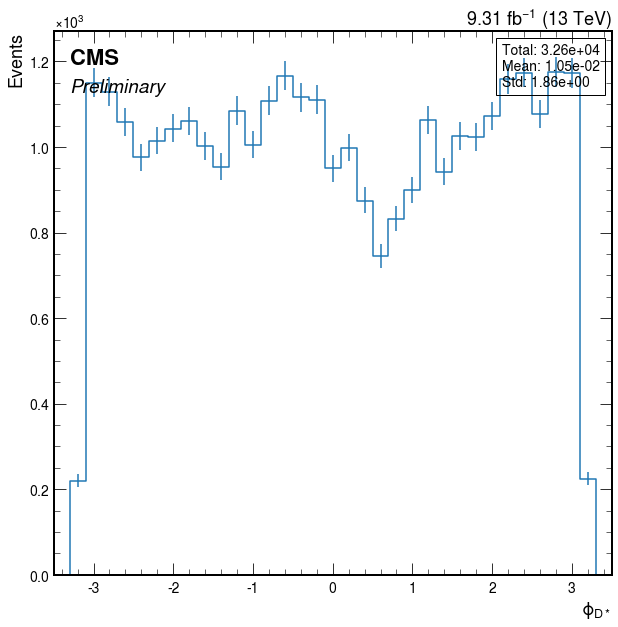

In [54]:
# phi

ax = hists['Dstar_p'].integrate('chg', 'right charge').sum('pt','eta')

bx = ax.rebin("phi", hist.Bin("phi", "$\phi_{D*}$", 35, -3.5, 3.5))

cx = create_plot1d(bx)


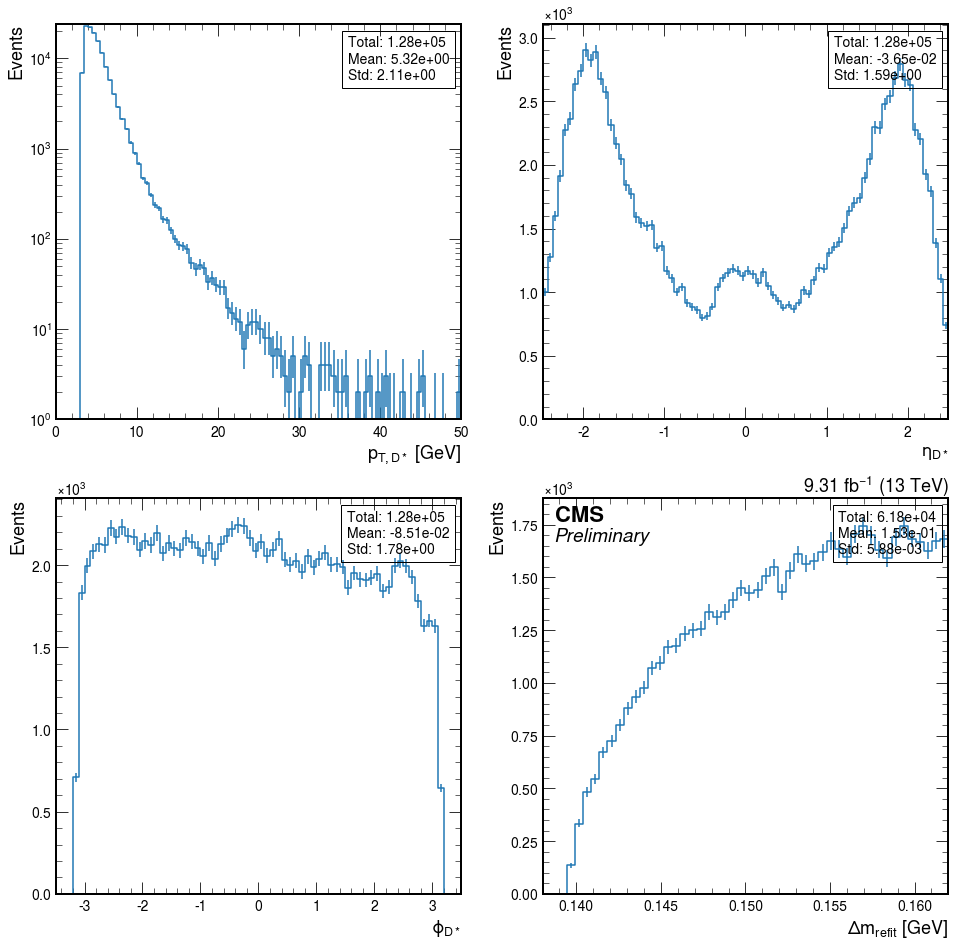

In [22]:
# Dstar wrg charge
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['Dstar_p'].integrate('chg', 'wrong charge'), 
                                                       hists['Dstar_deltamr'].integrate('chg', 'wrong charge'))

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.7/site-packages/coffea/hist/plot.py:357: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.7/site-packages/coffea/hist/plot.py:364: RuntimeWarning: invalid value encountered in true_divide
  rsumw_err = numpy.abs(poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.7/site-packages/coffea/hist/plot.py:378: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom**2)


weight: 1.1027392473426547


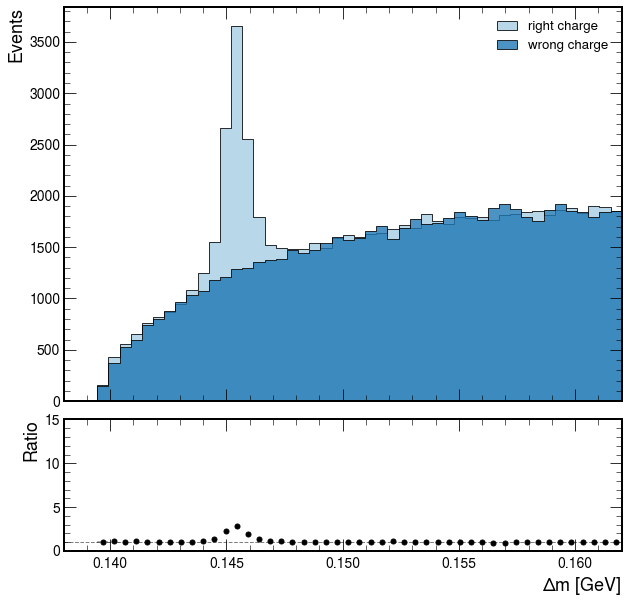

In [23]:
# Dstar wrg chg plot
hist_wrg_chg = hists['Dstar_deltamr'].integrate('chg', 'wrong charge')
hist_rgt_chg = hists['Dstar_deltamr'].integrate('chg', 'right charge')

w = get_dstar_weight(hist_rgt_chg, hist_wrg_chg)
hist_wrg_chg.scale(w)

ax, rax = ratio_plot(hist_rgt_chg, hist_wrg_chg)

handles, labels = ax.get_legend_handles_labels()
labels = ['right charge', 'wrong charge']

leg = ax.legend(handles, labels)

rax.set_xlabel('$\Delta m$ [GeV]')
print(f"weight: {w}")

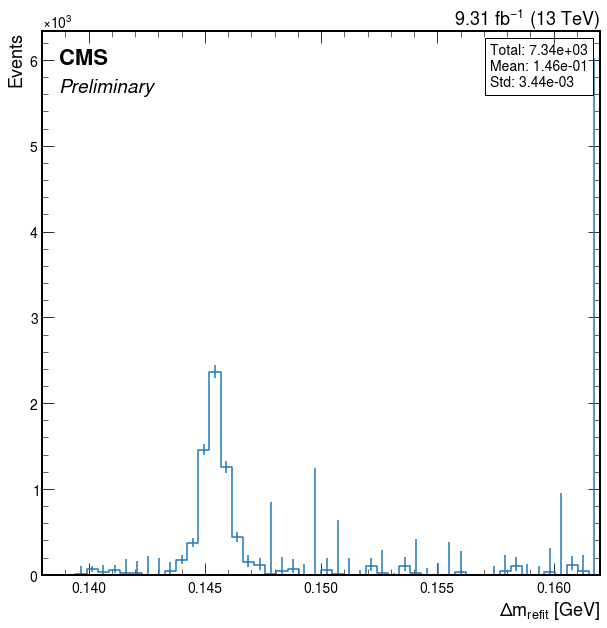

In [24]:
hist_wrg_chg.scale(-1)
histo = hist_rgt_chg + hist_wrg_chg
hist_wrg_chg.scale(1)
ax = create_plot1d(histo)
ax.legend().remove()

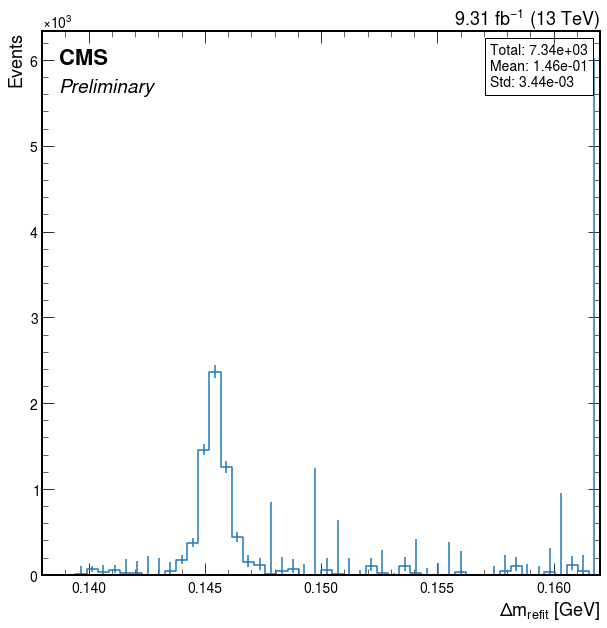

In [25]:
#### Changing the bin

ax = histo

bx = ax.rebin("deltamr", hist.Bin("deltamr", "$\Delta m_{refit}$ [GeV]", 50 , 0.138, 0.162))

cx = create_plot1d(bx)

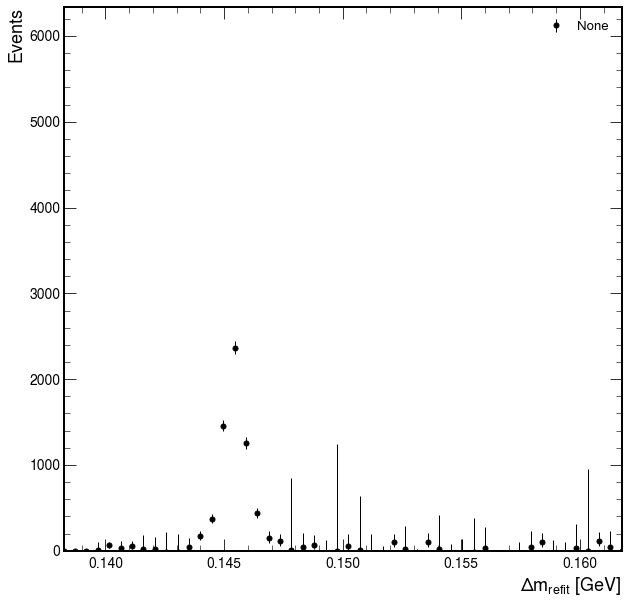

In [26]:
######################## D* Mass ########################

fill_opts = {
    'alpha': 0.8,
    'edgecolor':(0,0,0,.5)
}


data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}
    
# Data    
ax = hist.plot1d(histo, error_opts=data_err_opts)


In [ ]:
ax = create_plot1d(hists['Dstar_rap'].integrate('chg', 'right charge'))

In [ ]:
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['Dstar_K_p'])

In [ ]:
ax = hist.plot1d(hists['Dstar_K_p'].sum('phi','eta'), fill_opts=fill_opts)

ax.set_xlim(0, 4)
ax.set_ylim(1, 4.2e305)

In [ ]:
ax = create_plot2d(hists['Dstar_K_p'].sum('phi'))
ax.set_xlim(0, 10)

In [ ]:
ax = create_plot1d(hists['Dstar_K_chindof'])

In [ ]:
ax = create_plot1d(hists['Dstar_K_nValid'])

In [ ]:
ax = create_plot1d(hists['Dstar_K_nPix'])

In [ ]:
ax = create_plot1d(hists['Dstar_K_dxy'])

In [ ]:
ax = create_plot1d(hists['Dstar_K_dxy'])

In [ ]:
ax = create_plot1d(hists['Dstar_K_dz'])

In [ ]:
ax = create_plot2d(hists['Dstar_K_pt_eta'])

In [ ]:
# Dstar pi
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['Dstar_pi_p'])

In [ ]:
ax = hist.plot1d(hists['Dstar_pi_p'].sum('phi','eta'), fill_opts=fill_opts)

ax.set_xlim(0, 4)
ax.set_ylim(1, 2.9e3)

In [ ]:
ax = create_plot1d(hists['Dstar_pi_chindof'])

In [ ]:
ax = create_plot1d(hists['Dstar_pi_nValid'])

In [ ]:
ax = create_plot1d(hists['Dstar_pi_nPix'])

In [ ]:
ax = create_plot1d(hists['Dstar_pi_dxy'])

In [ ]:
ax = create_plot1d(hists['Dstar_pi_dz'])

In [ ]:
# Dstar pis
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['Dstar_pis_p'])

In [ ]:
ax = hist.plot1d(hists['Dstar_pis_p'].sum('phi','eta'), fill_opts=fill_opts)

ax.set_xlim(0, 4)
ax.set_ylim(1, 1.3e4)

In [ ]:
ax = create_plot1d(hists['Dstar_pis_chindof'])

In [ ]:
ax = create_plot1d(hists['Dstar_pis_nValid'])

In [ ]:
ax = create_plot1d(hists['Dstar_pis_nPix'])

In [ ]:
ax = create_plot1d(hists['Dstar_pis_dxy'])

In [ ]:
ax = create_plot1d(hists['Dstar_pis_dz'])

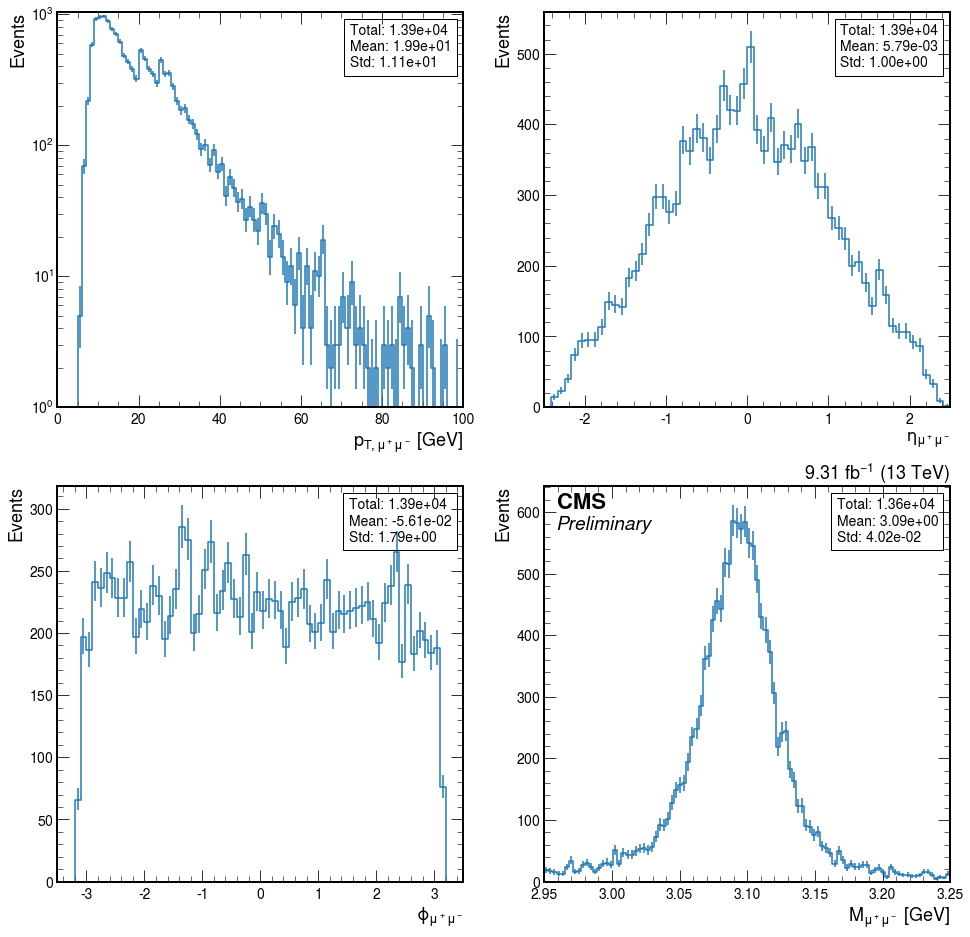

In [27]:
# Associated Jpsi Dstar
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['JpsiDstar']['Jpsi_p'], hists['JpsiDstar']['Jpsi_mass'])

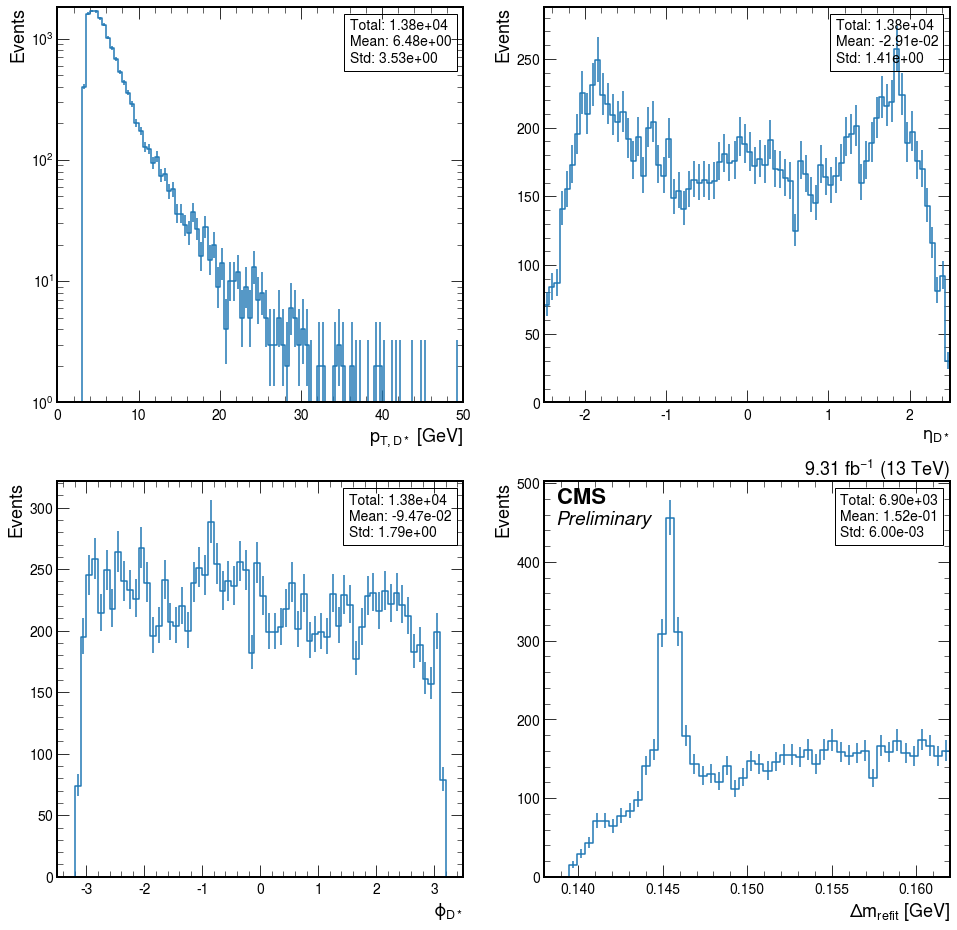

In [28]:
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['JpsiDstar']['Dstar_p'].integrate('chg', 'right charge'),
                                                       hists['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'))

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.7/site-packages/coffea/hist/plot.py:357: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.7/site-packages/coffea/hist/plot.py:364: RuntimeWarning: invalid value encountered in true_divide
  rsumw_err = numpy.abs(poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.7/site-packages/coffea/hist/plot.py:378: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom**2)


weight: 1.1309980587849646


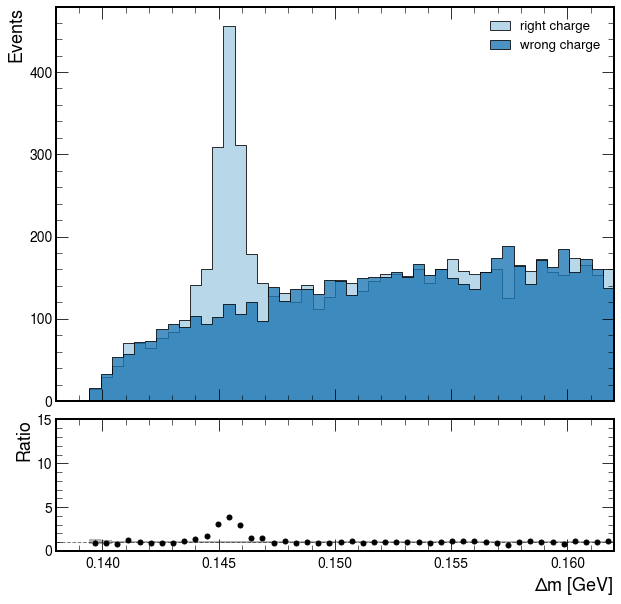

In [29]:
hist_wrg_chg = hists['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'wrong charge')
hist_rgt_chg = hists['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge')

w = get_dstar_weight(hist_rgt_chg, hist_wrg_chg)
hist_wrg_chg.scale(w)

ax, rax = ratio_plot(hist_rgt_chg, hist_wrg_chg)

handles, labels = ax.get_legend_handles_labels()
labels = ['right charge', 'wrong charge']

leg = ax.legend(handles, labels)

rax.set_xlabel('$\Delta m$ [GeV]')
print(f"weight: {w}")

TypeError: All axes must be derived from Axis class

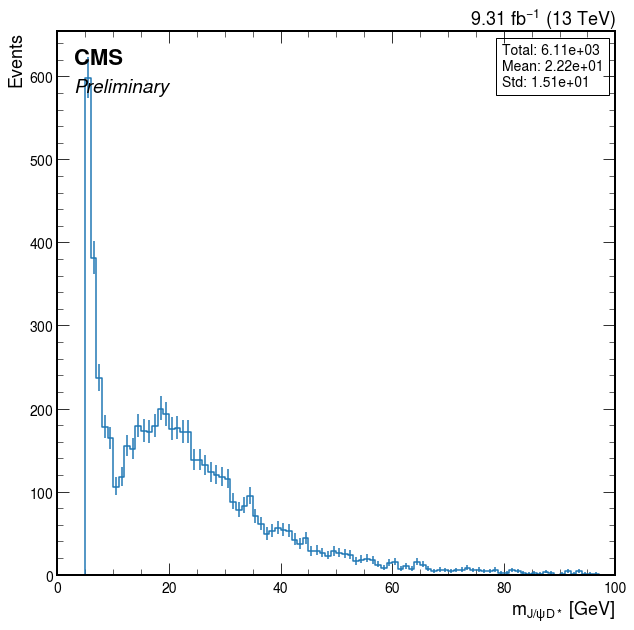

In [95]:
ax = create_plot1d(hists['JpsiDstar']['JpsiDstar_mass'])

ax.set_xlim(0, 100)


ax = hists['JpsiDstar']['JpsiDstar_mass']

bx = ax.rebin("mass", hist.Hist("Events", hist.Bin("mass", "$m_{J/\psi D*}$ [GeV]", 100, 0, 100)))

cx = create_plot1d(bx)

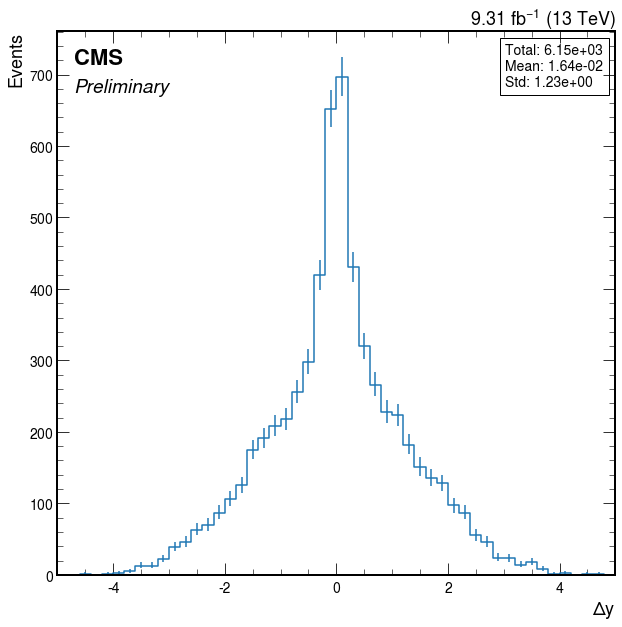

In [88]:
ax = create_plot1d(hists['JpsiDstar']['JpsiDstar_deltarap'])

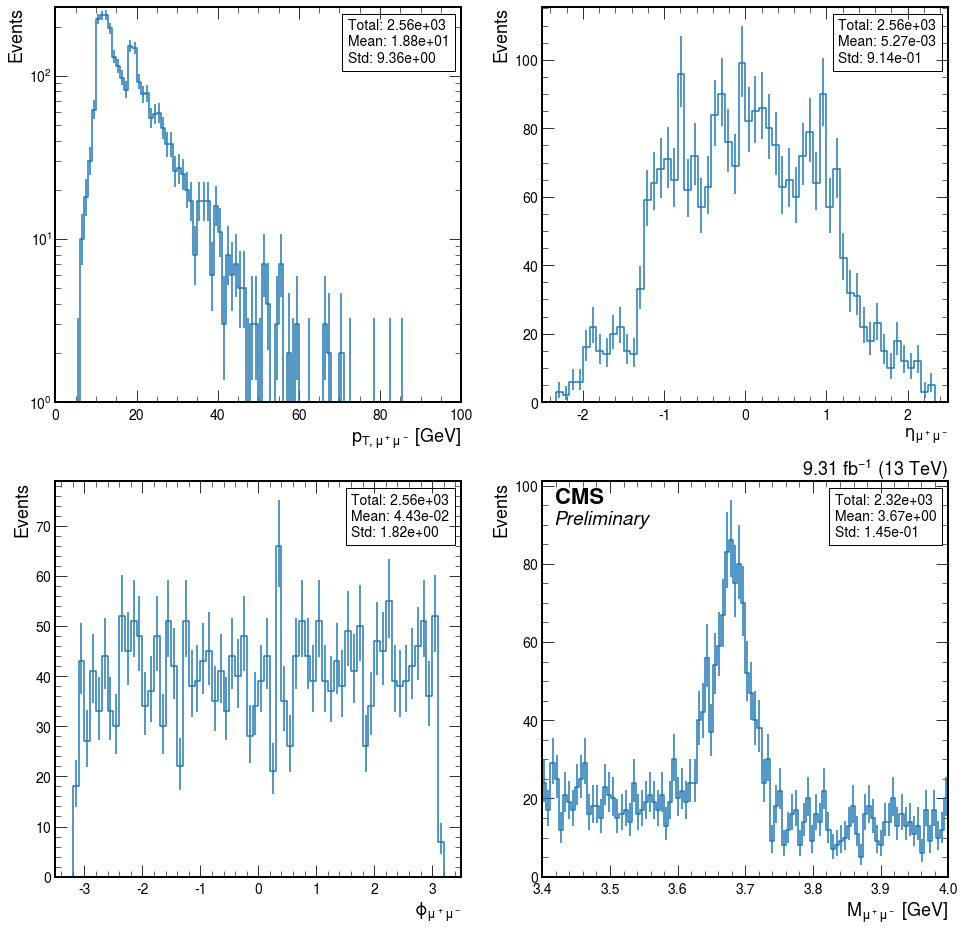

In [35]:
# Associated Psi Dstar
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['PsiDstar']['Psi_p'], hists['PsiDstar']['Psi_mass'])

In [ ]:
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['PsiDstar']['Dstar_p'].integrate('chg', 'right charge'),
                                                       hists['PsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'))

In [ ]:
hist_wrg_chg = hists['PsiDstar']['Dstar_deltamr'].integrate('chg', 'wrong charge')
hist_rgt_chg = hists['PsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge')

w = get_dstar_weight(hist_rgt_chg, hist_wrg_chg)
hist_wrg_chg.scale(w)

ax, rax = ratio_plot(hist_rgt_chg, hist_wrg_chg)

handles, labels = ax.get_legend_handles_labels()
labels = ['right charge', 'wrong charge']

leg = ax.legend(handles, labels)

rax.set_xlabel('$\Delta m$ [GeV]')
print(f"weight: {w}")

(0.0, 100.0)

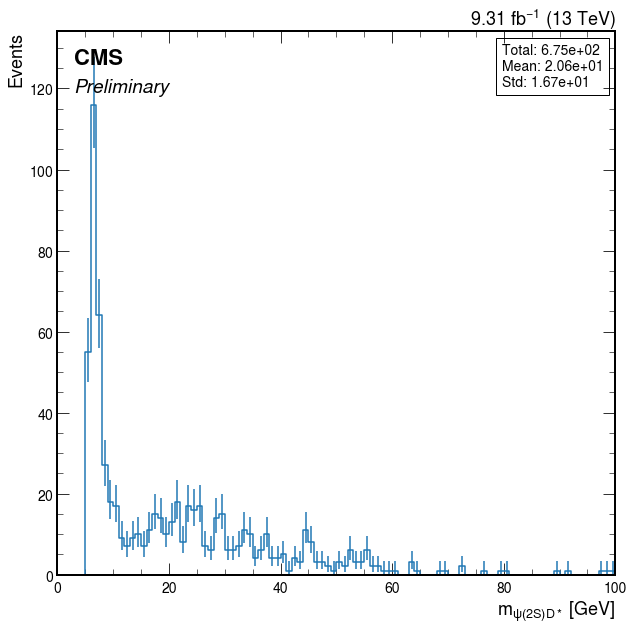

In [87]:
ax = create_plot1d(hists['PsiDstar']['PsiDstar_mass'])

ax.set_xlim(0, 100)

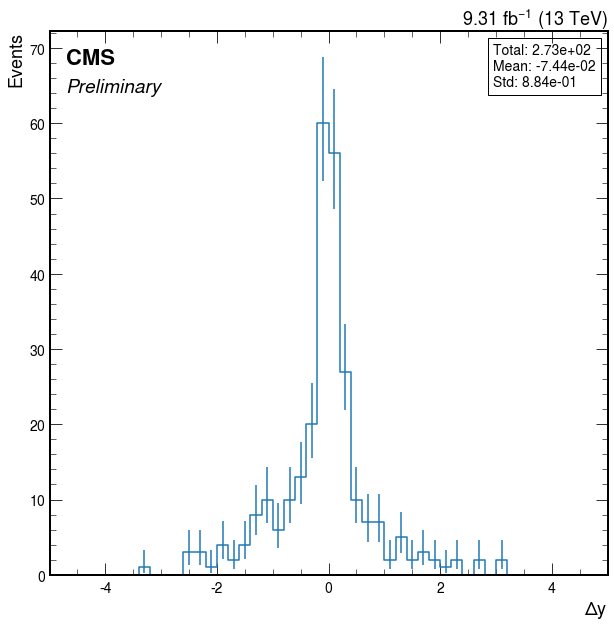

In [23]:
ax = create_plot1d(hists['PsiDstar']['PsiDstar_deltarap'])

In [ ]:
import awkward as ak
from coffea.util import load
from coffea import hist
import matplotlib.pyplot as plt
import mplhep

import numpy as np

plt.style.use(mplhep.style.CMS)

from coffea.nanoevents.methods import candidate
ak.behavior.update(candidate.behavior)

In [ ]:
#### Comparison Monte Carlo With data
## Data

# Charmonium 2017E

data_file = '../output/Charmonium2017E_test_loose_cuts/Charmonium2017E_test_loose_cuts_hists.coffea'

# Charmonium 2018B

#data_file = '../output/Charmonium2018B_test_loose_cuts/Charmonium2018B_test_loose_cuts_hists.coffea'

## Monte Carlo

mc_file = '../output/JpsiDstar_2017_test_loose_cuts_tests/JpsiDstar_2017_test_loose_cuts_tests_hists.coffea'


hists_data = load(data_file)
hists_mc = load(mc_file)

In [ ]:
######################## Primary vertex ########################


fill_opts = {
    'alpha': 0.8,
    'edgecolor':(0,0,0,.5)
}

data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}

# Data    

ax = hist.plot1d(
    hists_data['Primary_vertex_npvs'],
    error_opts=data_err_opts
)

# MC
ay = hist.plot1d(
    hists_mc['Primary_vertex_npvs'],
    fill_opts=fill_opts,
)

ax.autoscale(axis='x', tight=True)
ax.set_ylim(0, None)
ax.set_xlabel(None)
leg = ax.legend()

CMS = plt.text(0.03, 0.93, "CMS",
                  fontsize=22,
                  fontweight='bold',
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )
pre = plt.text(0.03, 0.88, "Preliminary",
                  fontsize=19,
                  fontstyle='italic',
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )
lumi = plt.text(1., 1., r"9.31 fb$^{-1}$ (13 TeV)",
                fontsize=18,
                fontstyle='normal',
                horizontalalignment='right',
                verticalalignment='bottom',
                transform=ax.transAxes
               )

handles, labels = ax.get_legend_handles_labels()
labels = ['$MC$', '$Data$']
ax.legend(handles, labels, prop={'size': 16})

ax.set_xlabel('$Number \ of \ Primary \ vertex$')
ax.set_ylim(0, 31000)

In [ ]:
######################## Jpsi Mass ########################

fill_opts = {
    'alpha': 0.8,
    'edgecolor':(0,0,0,.5)
}

data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}

# Data    

ax = hist.plot1d(
    hists_data['Jpsi_mass'],
    error_opts=data_err_opts
)

# MC
ay = hist.plot1d(
    hists_mc['Jpsi_mass'],
    fill_opts=fill_opts,
)

ax.autoscale(axis='x', tight=True)
ax.set_ylim(0, None)
ax.set_xlabel(None)
leg = ax.legend()

CMS = plt.text(0.03, 0.93, "CMS",
                  fontsize=22,
                  fontweight='bold',
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )
pre = plt.text(0.03, 0.88, "Preliminary",
                  fontsize=19,
                  fontstyle='italic',
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )
lumi = plt.text(1., 1., r"9.31 fb$^{-1}$ (13 TeV)",
                fontsize=18,
                fontstyle='normal',
                horizontalalignment='right',
                verticalalignment='bottom',
                transform=ax.transAxes
               )

handles, labels = ax.get_legend_handles_labels()
labels = ['$MC$', '$Data$']
ax.legend(handles, labels, prop={'size': 16})

ax.set_xlabel('$\mu^+\mu^- invariant\ mass\  [GeV]$')

In [ ]:
## pT

# Data
ax = hist.plot1d(hists_data['Jpsi_p'].sum('eta', 'phi'), error_opts=data_err_opts)

# MC
ay = hist.plot1d(hists_mc['Jpsi_p'].sum('eta', 'phi'), fill_opts=fill_opts)

ax.set_yscale('log')
ax.set_ylim(10, 1e4)

handles, labels = ax.get_legend_handles_labels()
labels = ['$MC$', '$Data$']
ax.legend(handles, labels, prop={'size': 16})

ax.set_xlabel('$J/\Psi\ p_T\ [GeV]$')

ay.set_yscale('log')
ay.set_ylim(10, 1e4)

In [ ]:
## eta

# Data
ax = hist.plot1d(hists_data['Jpsi_p'].sum('pt', 'phi'), error_opts=data_err_opts)

# MC
ay = hist.plot1d(hists_mc['Jpsi_p'].sum('pt', 'phi'), fill_opts=fill_opts)

handles, labels = ax.get_legend_handles_labels()
labels = ['$MC$', '$Data$']
ax.legend(handles, labels, prop={'size': 16})

ax.set_xlabel('$J/\Psi\ \eta$')

In [ ]:
## phi

# Data
ax = hist.plot1d(hists_data['Jpsi_p'].sum('pt', 'eta'), error_opts=data_err_opts)

# MC
ay = hist.plot1d(hists_mc['Jpsi_p'].sum('pt', 'eta'), fill_opts=fill_opts)

handles, labels = ax.get_legend_handles_labels()
labels = ['$MC$', '$Data$']
ax.legend(handles, labels, prop={'size': 16})

ax.set_xlabel('$J/\Psi\ \phi$')

In [ ]:
######################## D0 Mass ########################

fill_opts = {
    'alpha': 0.8,
    'edgecolor':(0,0,0,.5)
}
err_opts = {
        'linestyle': 'none',
        'marker': '.',
        'markersize': 10.,
        'elinewidth': 1,
}
    
# Data    
ax = hist.plot1d(hists_data['D0_mass12'], error_opts=data_err_opts)
ax.set_ylim(0, 160)

# MC
hist.plot1d(hists_mc['D0_mass12'], fill_opts=fill_opts)

handles, labels = ax.get_legend_handles_labels()
labels = ['$MC$', '$Data$']
ax.legend(handles, labels, prop={'size': 16})

ax.set_xlabel('$K\pi\ invariant\ mass\  [GeV]$')

In [ ]:
## pT

# Data
ax = hist.plot1d(hists_data['D0_p'].sum('eta', 'phi'), error_opts=data_err_opts)

# MC
ay = hist.plot1d(hists_mc['D0_p'].sum('eta', 'phi'), fill_opts=fill_opts)

ax.set_yscale('log')
ax.set_ylim(10, 4e3)

handles, labels = ax.get_legend_handles_labels()
labels = ['$MC$', '$Data$']
ax.legend(handles, labels, prop={'size': 16})

ax.set_xlabel('$D^0\ p_T\ [GeV]$')

ay.set_yscale('log')
ay.set_ylim(10, 4e3)

In [ ]:
## eta

# Data
ax = hist.plot1d(hists_data['D0_p'].sum('pt', 'phi'), error_opts=data_err_opts)

# MC
ay = hist.plot1d(hists_mc['D0_p'].sum('pt', 'phi'), fill_opts=fill_opts)

handles, labels = ax.get_legend_handles_labels()
labels = ['$MC$', '$Data$']
ax.legend(handles, labels, prop={'size': 16})

ax.set_xlabel('$D^0\ \eta$')
ax.set_ylim(0, 250)

In [ ]:
## phi

# Data
ax = hist.plot1d(hists_data['D0_p'].sum('pt', 'eta'), error_opts=data_err_opts)

# MC
ay = hist.plot1d(hists_mc['D0_p'].sum('pt', 'eta'), fill_opts=fill_opts)

handles, labels = ax.get_legend_handles_labels()
labels = ['$MC$', '$Data$']
ax.legend(handles, labels, prop={'size': 16})

ax.set_xlabel('$D^0\ \phi$')
ax.set_ylim(0, 250)

In [ ]:
######################## D* Mass ########################

fill_opts = {
    'alpha': 0.8,
    'edgecolor':(0,0,0,.5)
}
err_opts = {
        'linestyle': 'none',
        'marker': '.',
        'markersize': 10.,
        'elinewidth': 1,
}
    
# Data    
ax = hist.plot1d(hists_data['Dstar_deltamr'].integrate('chg', 'right charge'), error_opts=data_err_opts)
ax.set_ylim(0, 160)

# MC
hist.plot1d(hists_mc['Dstar_deltamr'].integrate('chg', 'right charge'), fill_opts=fill_opts)

handles, labels = ax.get_legend_handles_labels()
labels = ['$MC$', '$Data$']
ax.legend(handles, labels, prop={'size': 16})

ax.set_xlabel('$M(K\pi\pi_s)-M(K\pi)\  [GeV]$')
ax.set_ylim(0, 120)

In [ ]:
## pT

# Data
ax = hist.plot1d(hists_data['Dstar_p'].integrate('chg', 'right charge').sum('eta', 'phi'), error_opts=data_err_opts)

# MC
ay = hist.plot1d(hists_mc['Dstar_p'].integrate('chg', 'right charge').sum('eta', 'phi'), fill_opts=fill_opts)

ax.set_yscale('log')
ax.set_ylim(10, 1.5e2)
ax.set_xlim(0, 20)

handles, labels = ax.get_legend_handles_labels()
labels = ['$MC$', '$Data$']
ax.legend(handles, labels, prop={'size': 16})

ax.set_xlabel('$D^*\ p_T\ [GeV]$')

ay.set_yscale('log')
ay.set_ylim(10, 1.5e2)

In [ ]:
## eta

# Data
ax = hist.plot1d(hists_data['Dstar_p'].integrate('chg', 'right charge').sum('pt', 'phi'), error_opts=data_err_opts)

# MC
ay = hist.plot1d(hists_mc['Dstar_p'].integrate('chg', 'right charge').sum('pt', 'phi'), fill_opts=fill_opts)

handles, labels = ax.get_legend_handles_labels()
labels = ['$MC$', '$Data$']
ax.legend(handles, labels, prop={'size': 16})

ax.set_xlabel('$D^0\ \eta$')
ax.set_ylim(0, 25)